In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cyl_ecto_network import CylEctoNetwork
from hydranerv.models.network.neuron import Neuron
from hydranerv.models.network.rpnet.rp_neuron import RPNeuron
from hydranerv.utils import utils
from collections import defaultdict

from hydranerv.models.network.cyl_network import CylNetwork

In [3]:
def plot_train(train):
    plt.figure(figsize=(20,3))
    plt.plot(train)
    plt.show()

## stage 1

In [4]:
pacemakers = list(range(30))

In [16]:
ntwk = CylNetwork(num=30,
                num_hyp=30,
                num_ped=0,
                gc=500,
                dt=.01,
                tmax=500,
                pacemakers=pacemakers,
                t_ref=.1,
                conn_type="gap_junction",
                t_syn=.01,
                wnoise=10000,
                is_semi_pm=False,
                lambda_d=.3,
                rho=.5,
                seed=123)

# modify pacemakers
for pm in ntwk.pacemakers:
    neuron = ntwk.neurons[pm]
    neuron.k_a = 7500
    neuron.k_e = 1000

In [17]:
ntwk.run()

100%|█████████████████████████████████████| 49999/49999 [00:14<00:00, 3438.30it/s]


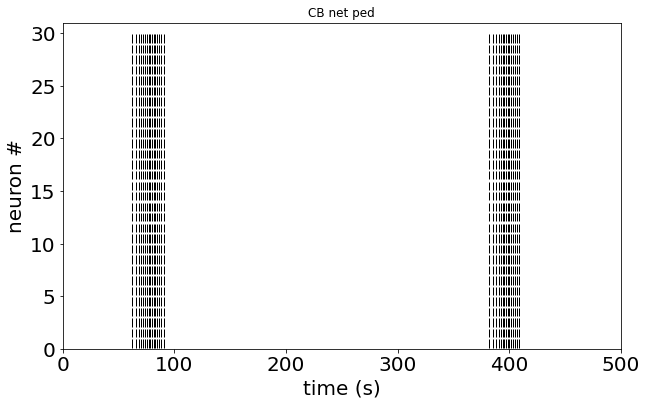

In [21]:
%matplotlib inline
ntwk.disp(xlim=(0, 500), title='CB net ped')

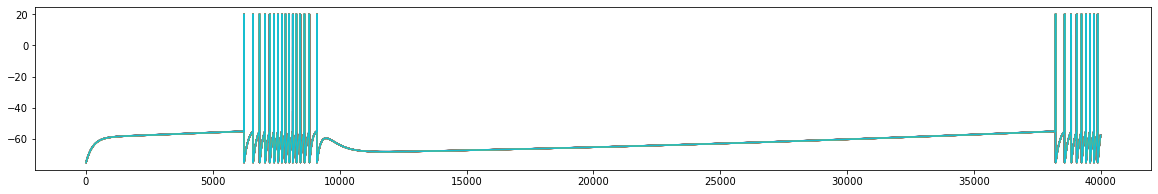

In [22]:
%matplotlib inline
plt.figure(figsize=(20,3))
for i in [x for x in range(30)]:
    plt.plot(ntwk.neurons[i].v_train[:40000])
# plt.plot(ntwk.cbnet.neurons[-1].sigma_w_train[:40000])
plt.show()

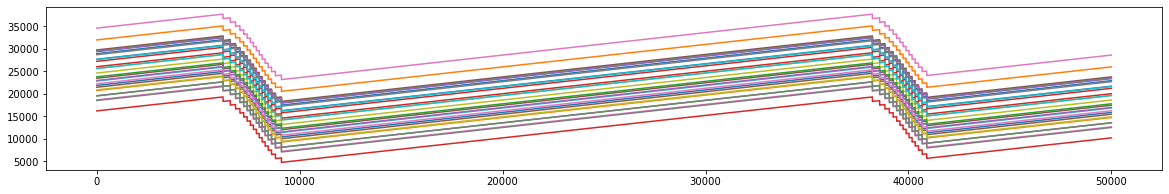

In [23]:
%matplotlib inline
plt.figure(figsize=(20,3))
for i in [x for x in range(30)]:
    # plt.plot(ntwk.neurons[i].v_train[:40000])
    plt.plot(ntwk.neurons[i].sigma_w_train[:])
plt.show()

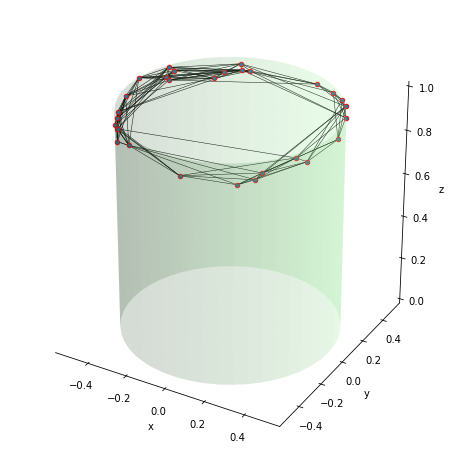

In [24]:
ntwk.disp_network()